Project: Suicides rates
Author: Keti Isajloska, reg no.:  70082616
Professor: Tomaz Curk

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data1 = pd.read_csv('master.csv')


-This dataset includes data for 101 country

In [4]:
df = pd.DataFrame(data1, columns = ['country']).country.unique()
print(df)
len(df)

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

101

* Countries with most and at least suicides/100k
-Lithuania's rate has been highest by a large margin: approximately > 41 suicides per 100k(per year)
-Exept Dominica and Saint Kitts and Nevis, Jamaica's rate has been lowest: approximately 0.5 suicides per 100k(per year) 

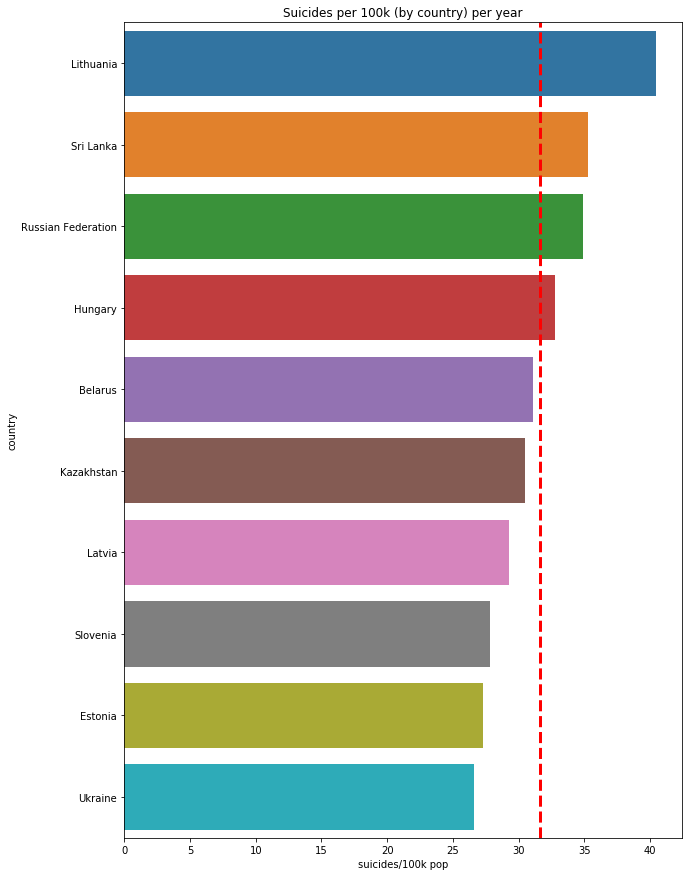

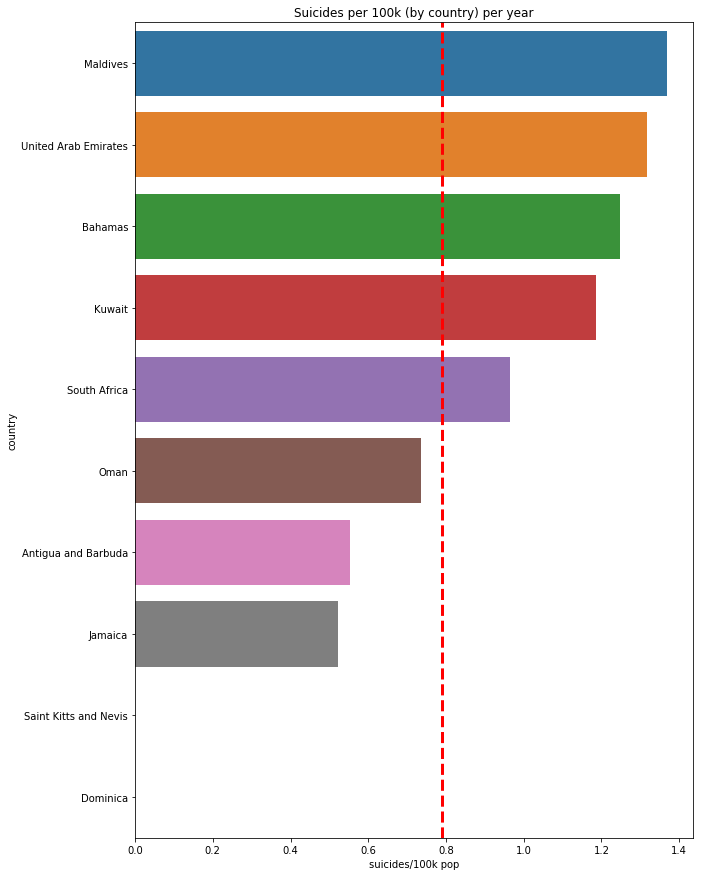

In [27]:
mostSuicidesByCountry = data1.groupby(['country']).mean().sort_values('suicides/100k pop',ascending=False).head(10).reset_index()
plt.figure(figsize=(10,15))
sns.barplot(x='suicides/100k pop',y='country', data=mostSuicidesByCountry)
plt.axvline(x = mostSuicidesByCountry['suicides/100k pop'].mean(), color='red',ls='--',linewidth=3)
plt.title('Suicides per 100k (by country) per year')
plt.show()

countriesWithAtLeastSuicides = data1.groupby(['country']).mean().sort_values('suicides/100k pop',ascending=False).tail(10).reset_index()
plt.figure(figsize=(10,15))
sns.barplot(x='suicides/100k pop',y='country', data=countriesWithAtLeastSuicides)
plt.axvline(x = countriesWithAtLeastSuicides['suicides/100k pop'].mean(), color='red',ls='--',linewidth=3)
plt.title('Suicides per 100k (by country) per year')
plt.show()

Globally, the likelihood of suicide increases with age
Since 1995, suicide rate for everyone aged >= 15 has been linearly decreasing
The suicide rate of those aged 75+ has dropped by more than 50% since 1990

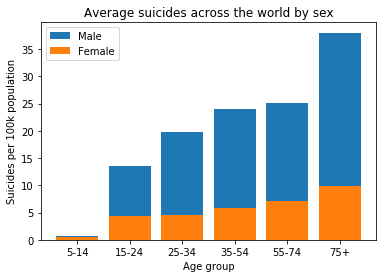

In [24]:
suicides_sex_age = data1[['sex', 'age', 'suicides/100k pop']].groupby(['sex', 'age']).mean()
# Reorder age index for visualization.
suicides_sex_age.reset_index(inplace=True)
suicides_sex_age['age'] = suicides_sex_age['age'].str.replace(' years', '')

age_sort = {'5-14': 0, '15-24': 1, '25-34': 2, '35-54': 3, '55-74': 4, '75+': 5}
suicides_sex_age['sort'] = suicides_sex_age['age'].map(age_sort)
suicides_sex_age.sort_values(by='sort', inplace=True)
suicides_sex_age.drop('sort', axis=1, inplace=True)
age_groups = suicides_sex_age['age'].unique()
male_suicides = suicides_sex_age[suicides_sex_age['sex'] == 'male']['suicides/100k pop']
female_suicides = suicides_sex_age[suicides_sex_age['sex'] == 'female']['suicides/100k pop']

plt.bar(age_groups, male_suicides, label='Male')
plt.bar(age_groups, female_suicides, label='Female')

plt.title('Average suicides across the world by sex')
plt.xlabel('Age group')
plt.ylabel('Suicides per 100k population')
plt.legend()
plt.show()

-Both male & female suicide rates peaked in 1995
-There is an overrepresentation of men in suicide deaths. Globally, the male rate is ~3.5x higher.

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


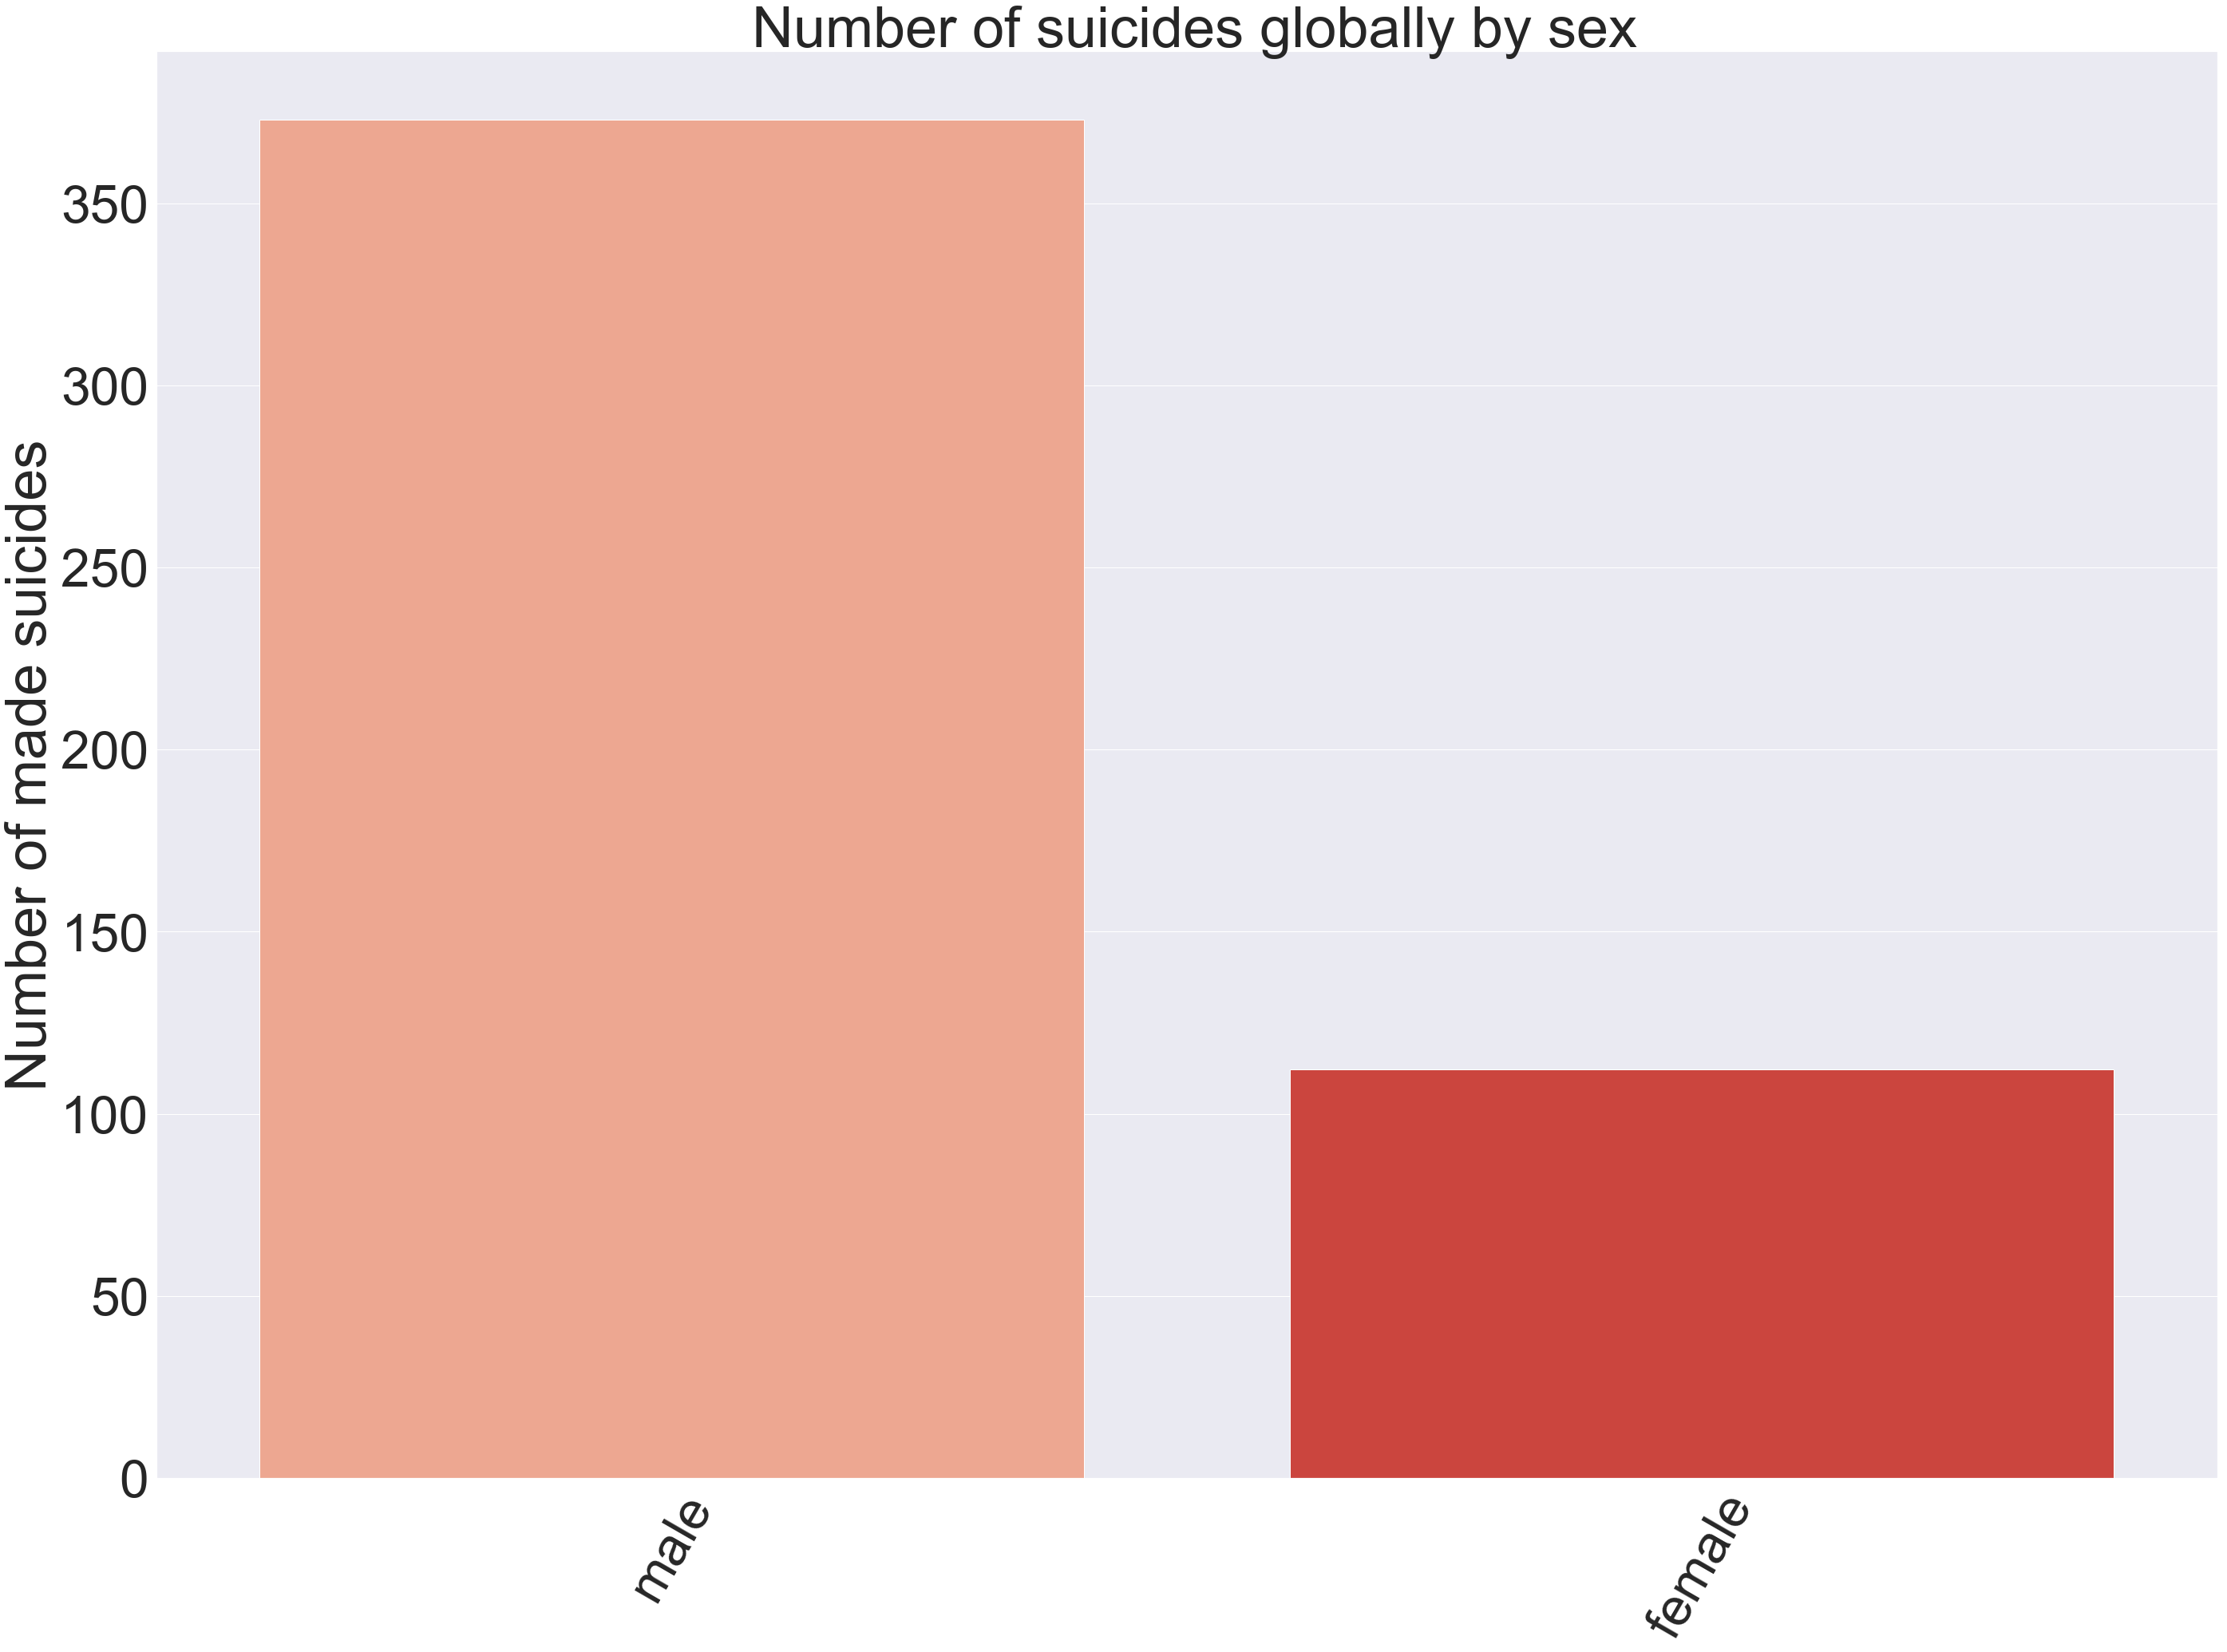

In [26]:
#Number of made suicides globally by sex
suicidesperyear = pd.DataFrame(data1['suicides_no'].groupby(data1['sex']).mean())
suicidesperyear = suicidesperyear.reset_index().sort_index(by='suicides_no',ascending=False)
suicidesperyear2 = suicidesperyear
fig = plt.figure(figsize=(40,30))
plt.title(' Number of suicides globally by sex')
sns.set(font_scale=4)
sns.barplot(y='suicides_no',x='sex',data=suicidesperyear2,palette="Reds");
plt.ylabel('Number of made suicides')
plt.xlabel('')
plt.xticks(rotation=60)
plt.tight_layout()

-The dashed line is the global average suicide rate from 1985 - 2015: 13.1 deaths (per 100k, per year)
-Peak suicide rate was 15.3 deaths per 100k in 1995
-Decreased steadily, to 11.5 per 100k in 2015 (~25% decrease)
-Rates are only now returning to their pre-90’s rates
-Limited data in the 1980’s, so it’s hard to say if rate then was truly representative of the global population

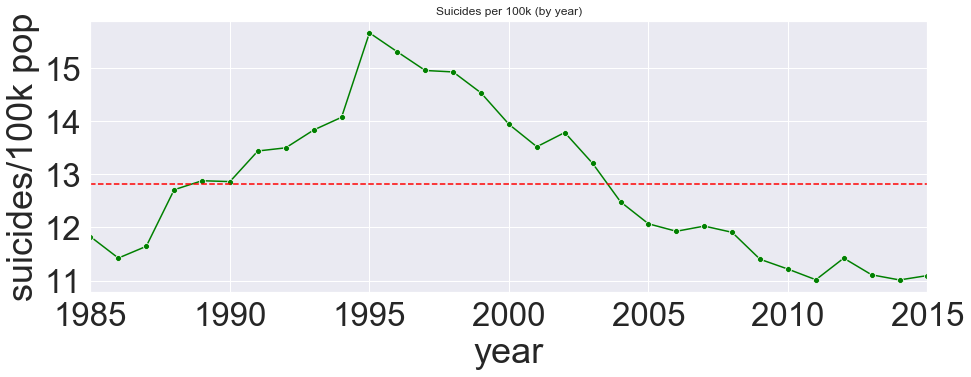

In [43]:
byYear = data1.groupby('year').mean().reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(x='year', y='suicides/100k pop', data=byYear, color='green',marker='o')
plt.axhline(byYear['suicides/100k pop'].mean(), ls='--', color='red')
sns.set(font_scale=1)
plt.title('Suicides per 100k (by year)')
sns.set(font_scale=1)
plt.xlim(1985,2015)
plt.show()

* Do richer countries have a higher rate of suicide?
-Instead of looking at trends within countries, here I take every country and calculate their mean GDP (per capita) across all the years in which data is available. 
-Richer countries are associated with higher rates of suicide, but this is a weak relationship which can be seen from the graph below.

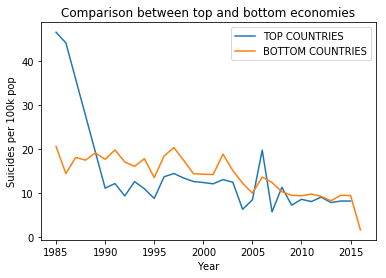

In [23]:
suicides_poor_rich = data1[['year', 'country', 'gdp_per_capita ($)', 'suicides/100k pop']]

# Sort the the countries by their average gpd over the years.
# Then get the list of the countries ordered.
countries_by_gpd = suicides_poor_rich.groupby('country').mean().sort_values('gdp_per_capita ($)', ascending=False).index
# Get the top and bottom 5 countries of the list.
top_countries = countries_by_gpd[:5]
bot_countries = countries_by_gpd[-5:]

# Append them for the future filter.
countries_to_compare = top_countries.append(bot_countries)
# Filter the rows that only are one of those countries.
suicides_poor_rich = suicides_poor_rich.loc[suicides_poor_rich['country'].isin(countries_to_compare)]
suicides_poor_rich.sample(5)
# Create a filter for splitting those countries into two groups.
country_filter = {country:'TOP COUNTRIES' for country in top_countries}
country_filter.update({country:'BOTTOM COUNTRIES' for country in bot_countries})
# Apply the filter.
suicides_poor_rich['country'] = suicides_poor_rich['country'].map(country_filter)
suicides_poor_rich.sample(5)
# Simply, plot the results.
sns.lineplot(x='year', y='suicides/100k pop', data=suicides_poor_rich, hue='country', ci=None)
plt.legend(labels=['TOP COUNTRIES', 'BOTTOM COUNTRIES'])

plt.title('Comparison between top and bottom economies')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k pop')
plt.show()

* Relation between count of suicides and GDP
-There is a weak but significant positive linear relationship between a countries GDP and suicide rate - richer countries are associated with higher rates of suicide, but this is a weak relationship which can be seen from the graph below.

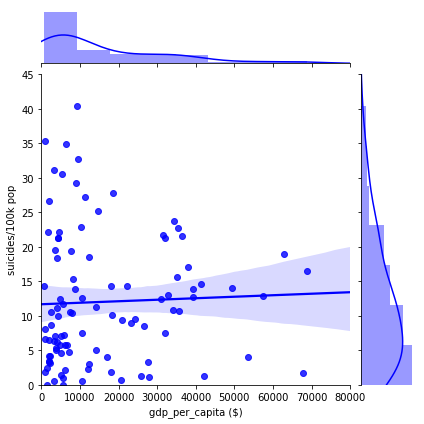

In [56]:
suicidesByCountry = data1.groupby('country').mean().sort_values('suicides/100k pop', ascending=False).reset_index()
g = sns.jointplot(x="gdp_per_capita ($)", y="suicides/100k pop", data=suicidesByCountry, kind='regresion',xlim=(-100,80000), ylim=(0,45), color='blue')

* Slovenian case
-I would like to understand if the financial crisis from 2000 to 2013 (https://en.wikipedia.org/wiki/Economy_of_Slovenia) is reflected somehow in the suicides
-Information: "Slovenian economy has been severely hurt by the European economic crisis, which started in late 2000s.[15] After 2013 GDP per capita is rising again.[16] Almost two thirds of the working population are employed in services.[2]"

* Count of suicides for Slovenia from 1995 to 2016

In [ ]:
dataslovenia=data1.query("country=='Slovenia'")
suicidesperyear = pd.DataFrame(dataslovenia['suicides_no'].groupby(dataslovenia['year']).sum())
suicidesperyear = suicidesperyear.reset_index().sort_index(by='suicides_no',ascending=False)
suicidesperyear2 = suicidesperyear
fig = plt.figure(figsize=(50,40))
plt.title('Count of suicides for Slovenia from 1995 to 2016')
sns.set(font_scale=6)
sns.barplot(y='suicides_no',x='year',data=suicidesperyear2,palette="GnBu_d");
plt.ylabel('Count of made suicides')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()

* SUICIDES PER 100K POP AND ITS RELATION TO THE GDP
-In the following plots the red line represents the mean of the 'y variable' and the vertical black lines the years 2000 and 2013
-The number of suicides per 100k between 2000 and 2013 variates below and under the mean over years, there is an increment of the number of suicides from 2000 (in the beginning of the crisis) to 2001, then it's starts decreasing etc.
-Clearly the GDP of Slovenia in the beginning of the crisis is very low. As the years go, GDP is slightly increasing, with some variates. From the joinplot we can figure out that in Slovenia the GDP is related to the number of suicides (if the GDP increases the number of suicides decreases).

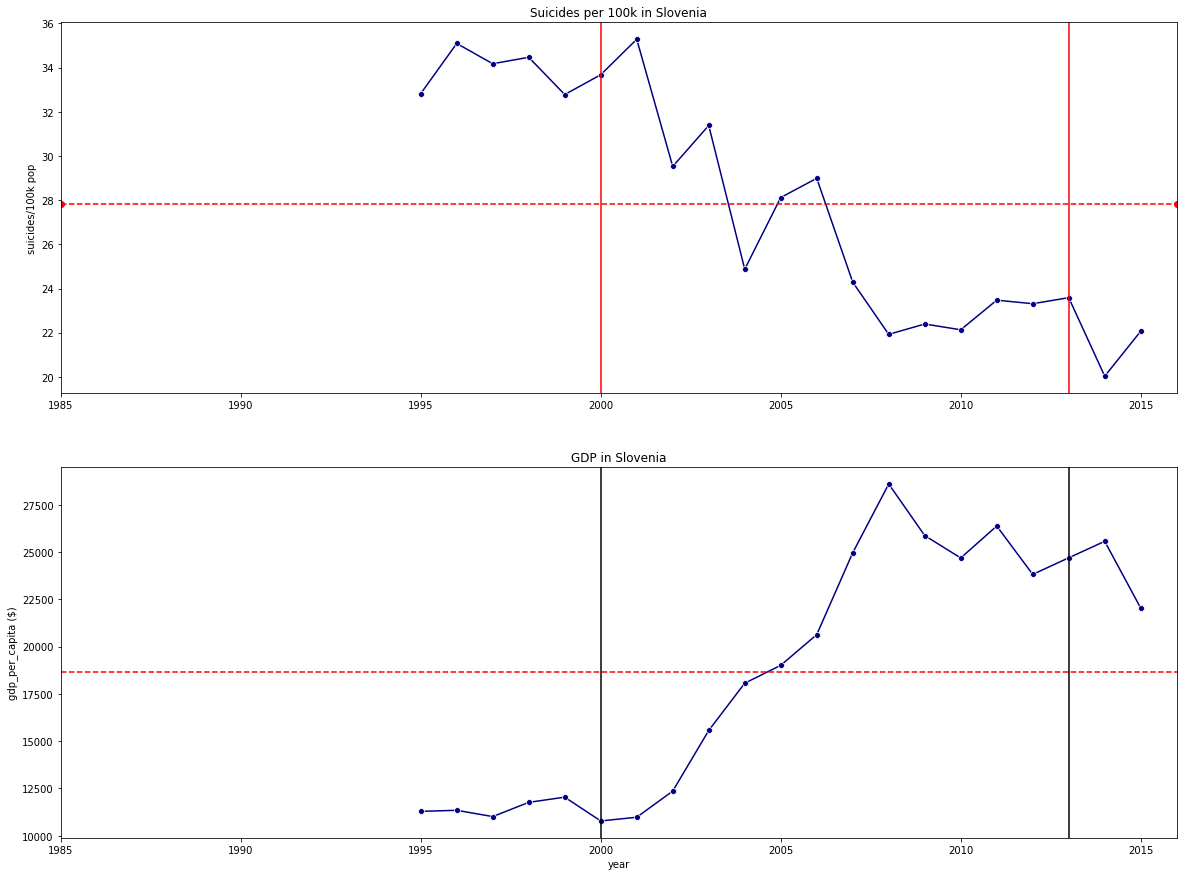

In [14]:
sloveniaSuicides = data1[data1['country']=='Slovenia']
slovenia_byYear = sloveniaSuicides.groupby('year').mean().reset_index()
slovenia_bySexYear = sloveniaSuicides.groupby(['sex','year']).mean().reset_index()
slovenia_byAgeYear = sloveniaSuicides.groupby(['age','year']).mean().reset_index()
plt.figure(figsize=(20,15))

plt.subplot(211)
sns.lineplot(x='year', y='suicides/100k pop', data=slovenia_byYear, color='navy',marker='o')
plt.axhline(slovenia_byYear['suicides/100k pop'].mean(), ls='--', color='red', marker='o')
plt.axvline(x=2000, ls='-', color='red')
plt.axvline(x=2013, ls='-', color='red')
plt.title('Suicides per 100k in Slovenia')
plt.xlim(1985,2016)
plt.xlabel('')

plt.subplot(212)
sns.lineplot(x='year', y='gdp_per_capita ($)', data=slovenia_byYear, color='navy',marker='o')
plt.axhline(slovenia_byYear['gdp_per_capita ($)'].mean(), ls='--', color='red')
plt.title('GDP in Slovenia')
plt.xlim(1985,2016)
plt.axvline(x=2000, ls='-', color='black')
plt.axvline(x=2013, ls='-', color='black')

plt.tight_layout
plt.show()



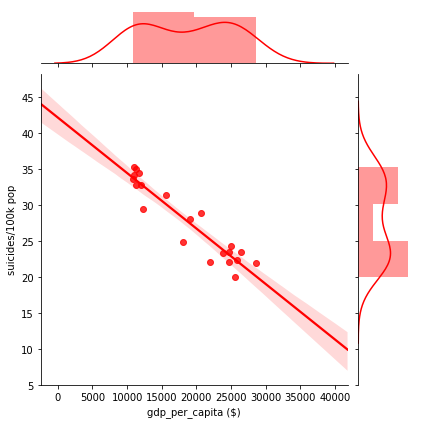

In [49]:
g = sns.jointplot(x="gdp_per_capita ($)", y="suicides/100k pop", data=slovenia_byYear, kind='regresion', color='red')


NUMBER OF SUICIDES PER 100K POP AND ITS RELATION TO AGE AND SEX

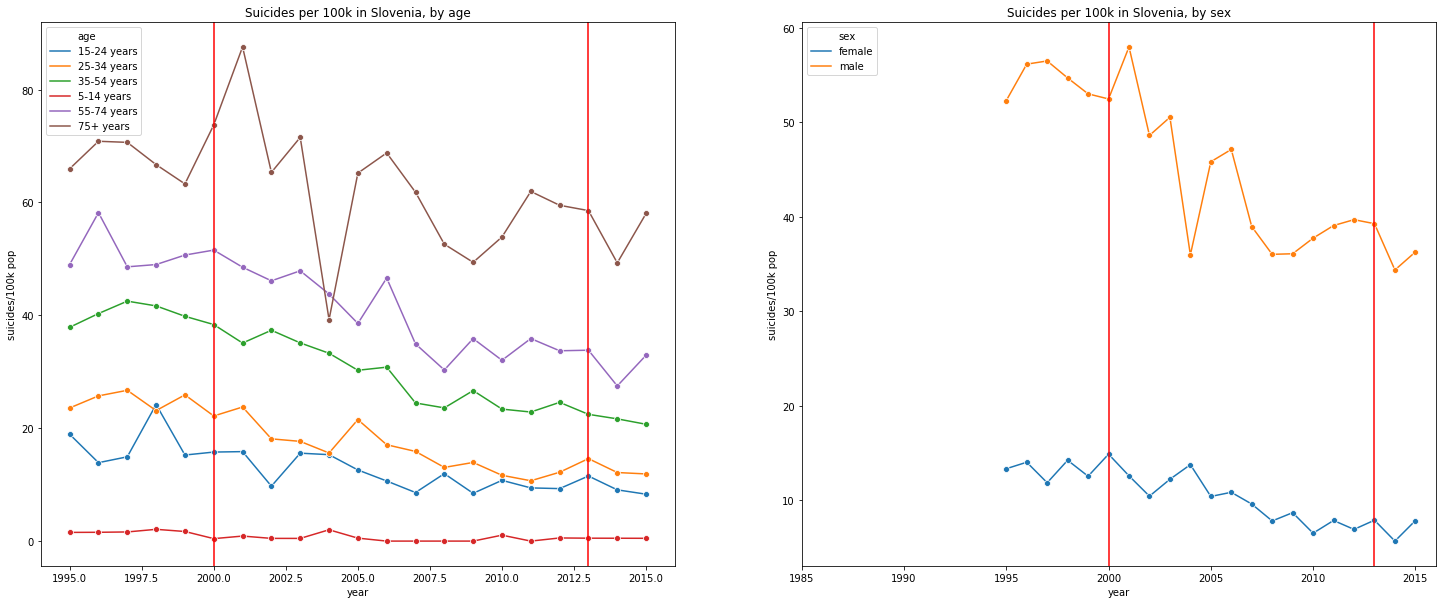

In [22]:
plt.figure(figsize=(25,10))
plt.subplot(121),
sns.lineplot(x='year', y='suicides/100k pop', data=slovenia_byAgeYear, hue='age', marker='o')
plt.axvline(x=2000, ls='-', color='red')
plt.axvline(x=2013, ls='-', color='red')
plt.title('Suicides per 100k in Slovenia, by age')

plt.subplot(122)
sns.lineplot(x='year', y='suicides/100k pop', data=slovenia_bySexYear, hue='sex',marker='o')
plt.xlim(1985,2016)
plt.axvline(x=2000, ls='-', color='red')
plt.axvline(x=2013, ls='-', color='red')
plt.title('Suicides per 100k in Slovenia, by sex')

plt.show()

-It seems that in every age group the decreasing trend in the number of suicides changes after 2013.
-On average, suicide rate increases with age.